In [1]:
import sys
sys.path.append('../utils')
sys.path.append('../core')
sys.path.append('../')
import numpy as np
import scipy
import tqdm
import utils
import geometry_update as geometry
from core import *

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import glob

from functools import reduce
from math import sqrt

In [2]:
test_phantom = phantom_update.Phantom(source_path = None,
            voxel_dims = (0.1e-3,0.1e-3,0.1e-3),
            matrix_dims = (100,100,100),
            baseline = (1500, 1000),
            seed = 5678,)

blood = tissue.Tissue(name='blood', c=1578, rho=1060, sigma=11.3, scale=0.00001, label=1)
test_phantom.add_tissue_sphere((0,0,0), 4, blood)
test_phantom.add_tissue_sphere((0.5,0,0), 10, blood)

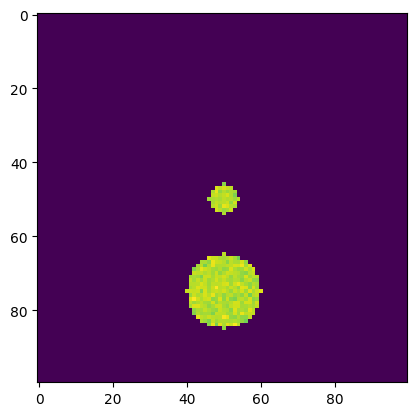

In [3]:
plt.imshow(test_phantom.get_complete()[0,:,:,test_phantom.matrix_dims[2]//2])

In [4]:
test_phantom.voxel_dims * test_phantom.matrix_dims * 1000

array([10., 10., 10.])

In [5]:
simprops = simulation_update.SimProperties(
                grid_size   = (10e-3,4e-3,2e-3),
                voxel_size  = (0.02e-3,0.02e-3,0.02e-3),
                PML_size    = (1,1,1),
                PML_alpha   = 2,
                t_end       = 12e-5,           # [s]
                bona        = 6,               # parameter b/a determining degree of nonlinear acoustic effects
                alpha_coeff = 0.5, 	           # [dB/(MHz^y cm)]
                alpha_power = 1.5,
                )

In [6]:
simprops.matrix_size

array([512, 256, 128])

In [7]:
bounds = simprops.bounds
# transform = geometry.Transform((-np.pi/8,np.pi/1.6,0),(0.001,-0.001,0.0001))
transform = geometry.Transform((np.pi/2,np.pi/2,np.pi/2),(0,0,0))
# transform = geometry.Transform((0,0,0),(0,0,0))
voxel_size = simprops.voxel_size
matrix_size = simprops.matrix_size

In [8]:
out = test_phantom.crop_rotate_crop(bounds, transform, voxel_size, matrix_size)

first_crop_bounds_indices [[ 36  64]
 [ 23  77]
 [ 49 154]]
padding: (0, 0, 54)
to pad [[ 0  0]
 [ 0  0]
 [54 54]]
new first_crop_bounds_indices [[ 36  64]
 [ 23  77]
 [103 208]]
initial matrix shape (2, 100, 100, 208)
cropped matrix shape (2, 28, 54, 105), pre rotation
rotated matrix shape (2, 105, 105, 105)
bias pre transform [0.005   0.005   0.00504]
bias post transform [ 0.00504  0.005   -0.005  ]
grid size [102.4  51.2  25.6]
start [ 0 26 39]
end [104  78  65]
bias pre second crop [ 0.00504  0.005   -0.005  ]
bias post second crop [ 0.00509  0.00505 -0.00495]
rough_crop = (2, 104, 52, 26)
interpolated_shape = (2, 520, 260, 130)
sampled_matrix shape (2, 520, 260, 130)
matrix_size shape [512 256 128]
bias [ 0.49707033  0.9863281  -1.93359371]
start [4 2 1]
end [516 258 129]
(2, 512, 256, 128)


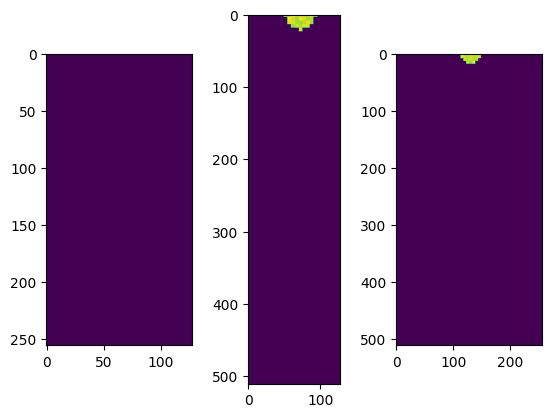

In [9]:
fig, ax = plt.subplots(1,3,)

ax[0].imshow(out[0,out.shape[1]//2,:,:])
ax[1].imshow(out[0,:,out.shape[2]//2,:])
ax[2].imshow(out[0,:,:,out.shape[3]//2])